<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Jerimiah_Willhite_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [3]:
print(cell_phones.head(10))
print(population.head(10))
print(geo_country_codes.head(10))

   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0
5  abw  1977                0.0
6  abw  1978                0.0
7  abw  1979                0.0
8  abw  1980                0.0
9  abw  1981                0.0
   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000
5  afg  1805           3280000
6  afg  1806           3280000
7  afg  1807           3280000
8  afg  1808           3280000
9  afg  1809           3280000
         geo alt_5  ... world_4region        world_6region
0       abkh   NaN  ...        europe  europe_central_asia
1        abw   NaN  ...      americas              america
2        afg   NaN  ...          asia           south_asia
3        ago   NaN  ...        africa   sub_saharan_africa
4        aia

In [7]:
geo_country_codes.columns.values

array(['geo', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3',
       'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5',
       'arb6', 'g77_and_oecd_countries', 'gapminder_list', 'god_id',
       'gwid', 'income_groups', 'is--country', 'iso3166_1_alpha2',
       'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2', 'landlocked',
       'latitude', 'longitude', 'main_religion_2008', 'country', 'pandg',
       'un_state', 'unicode_region_subtag', 'upper_case_name',
       'world_4region', 'world_6region'], dtype=object)

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [68]:
merged = cell_phones.merge(population, how='inner', on=['geo', 'time'])
print(merged.shape)
merged.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [69]:
df = merged.merge(geo_country_codes[['geo', 'country']])
df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [70]:
print(df.shape)

(8590, 5)


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [71]:
df['phone_per_person'] = (df['cell_phones_total'] /df['population_total'] )
df.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [72]:
usa = df[df['country'] == 'United States']
usa[usa['time'] == 2017]

,geo,time,cell_phones_total,population_total,country,phone_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [73]:
df['geo'] = df['geo'].str.upper()
df.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [74]:
##numeric columns
df.describe(exclude='object')

,time,cell_phones_total,population_total,phone_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [75]:
##non-numeric columns
df.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,DEU,Lithuania
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [76]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

#ANSWERS
'''
1. China
2. India
3. Indonesia
4. United States
5. Brazil
'''

'\n1. China\n2. India\n3. Indonesia\n4. United States\n5. Brazil\n'

In [77]:
year_2017 = df[df['time'] == 2017]
year_2017.sort_values(by='cell_phones_total', ascending = False)

,geo,time,cell_phones_total,population_total,country,phone_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224
6636,RUS,2017,"227,341,873.0",143989754,Russia,1.5788753483112417
3990,JPN,2017,"170,128,499.0",127484450,Japan,1.3345039257729079
718,BGD,2017,"145,113,669.0",164669751,Bangladesh,0.8812405928761015
5748,NGA,2017,"144,920,170.0",190886311,Nigeria,0.7591962422072267
6104,PAK,2017,"144,525,637.0",197015955,Pakistan,0.7335732631400335


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [78]:
#Changed it to 0.9 just to confirm it was getting the right data

us_cell_phones = df[(df['country'] == 'United States') & (df['phone_per_person'] > 0.9)]
us_cell_phones.sort_values(by='time')

##ANSWER
#2014



,geo,time,cell_phones_total,population_total,country,phone_per_person
8127,USA,2010,"285,118,000.0",308641391,United States,0.9237840688710478
8128,USA,2011,"297,404,000.0",311051373,United States,0.9561250192584747
8129,USA,2012,"304,838,000.0",313335423,United States,0.9728807457559626
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [225]:
decade = df[(df['time'] > 2007) & (df['time'] < 2017)]
usa = df[df['country'] == 'United States']
china = df[df['country'] == 'China']
india = df[df['country'] == 'India']
indonesia = df[df['country'] == 'Indonesia']
brazil = df[df['country'] == 'Brazil']
five = [usa, china, india, indonesia, brazil]
pt = pd.pivot_table(df, index=five['country'], columns=decade['time'])
pt.shape

TypeError: ignored

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
ds = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
ds['Occupation'] = ds['Group'].apply(get_occupation)

In [80]:
print(ds.shape)
ds.head()

(2693, 6)


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [83]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 6 columns):
Year                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null object
Group                        2662 non-null object
Guest                        2693 non-null object
Occupation                   2693 non-null object
dtypes: int64(1), object(5)
memory usage: 126.3+ KB


In [87]:
print(ds.Year.value_counts())
ds['Occupation'].value_counts()


2000    169
2003    166
2013    166
1999    166
2010    165
2012    164
2008    164
2004    164
2009    163
2011    163
2014    163
2005    162
2006    161
2002    159
2001    157
2007    141
2015    100
Name: Year, dtype: int64


Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [139]:
##ANSWER (this should show all the information needed)
guest_occ = pd.crosstab(ds['Year'], ds['Occupation'], normalize='index')*100
guest_occ

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504
2000,73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249
2001,72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414
2002,62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044
2003,56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253
2004,38.41463414634146,22.5609756097561,27.439024390243905,11.585365853658537
2005,37.03703703703704,16.049382716049383,33.33333333333333,13.580246913580247
2006,36.024844720496894,19.25465838509317,29.19254658385093,15.527950310559005
2007,25.53191489361702,17.02127659574468,33.33333333333333,24.113475177304963


### Part 2 — Recreate this explanatory visualization:

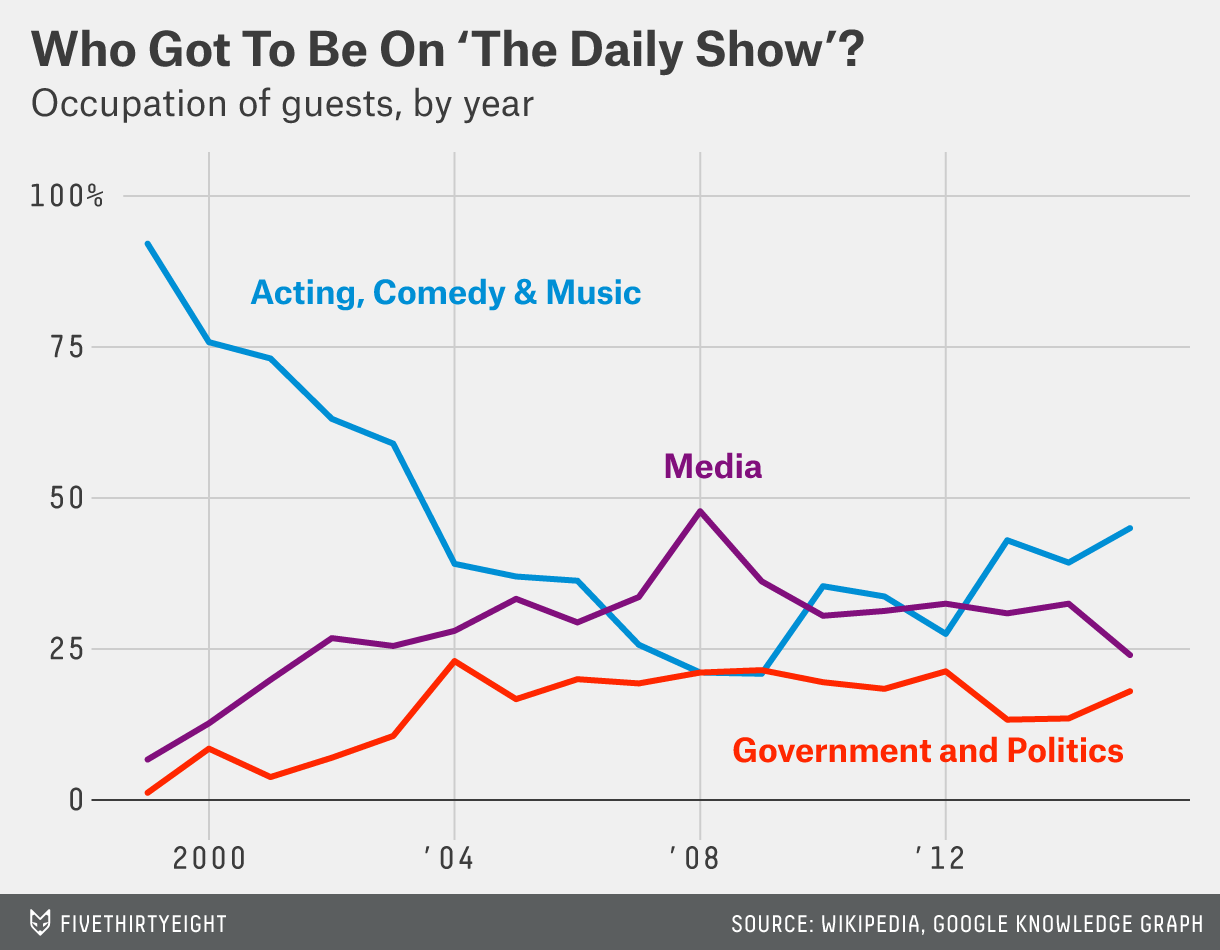

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:

guest_occ = guest_occ.drop(columns='Other')

In [0]:
from matplotlib.ticker import PercentFormatter
import altair as alt
import seaborn as sns

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

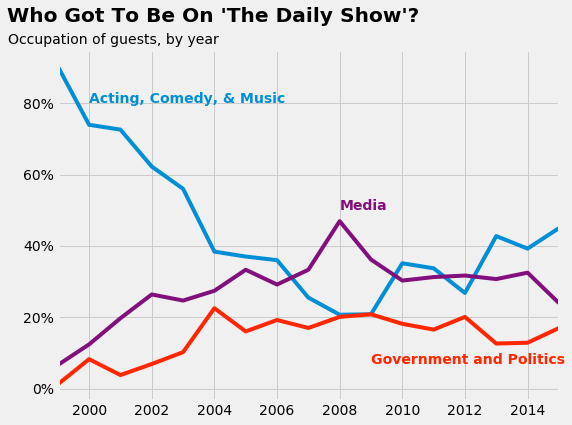

In [238]:


#Using 538's style to make it as similar as possible
plt.style.use('fivethirtyeight')
ax.ylabel=''
ax = guest_occ.plot(figsize = (8, 6), color=['#008fd6', '#ff2600', '#810f7c'])
plt.suptitle("Who Got To Be On 'The Daily Show'?", x=0.35, fontsize='x-large', fontweight='bold')
plt.title("Occupation of guests, by year", x=0.11, fontsize='medium')

#Putting Text on Lines
plt.text(2000, 80,'Acting, Comedy, & Music', color='#008fd6', fontweight='bold')
plt.text(2009, 7,'Government and Politics', color='#ff2600', fontweight='bold')
plt.text(2008, 50,'Media', color='#810f7c', fontweight='bold')

#Adds the percentage sign%
ax.yaxis.set_major_formatter(PercentFormatter())

#Removes Legend
ax.get_legend().remove()


#Removes X-axis label of "year"
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)

plt.show()
